In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
data=pd.read_csv("Social_Network_Ads copy.csv")

In [5]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [6]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x=data.iloc[:,:-1]
y=data["Purchased"]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [10]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

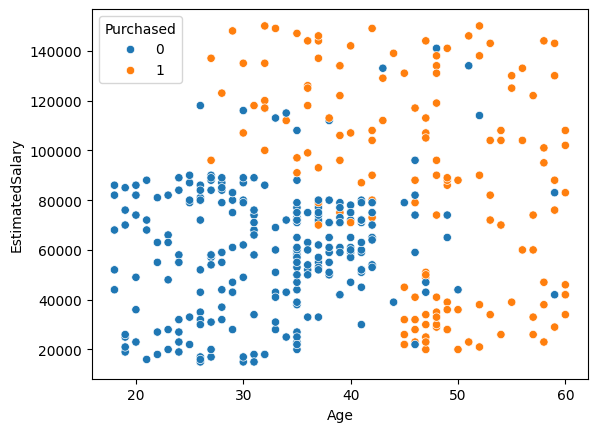

In [27]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=data,hue="Purchased")
plt.show()

In [14]:
dt.score(x_test,y_test)*100

83.75

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

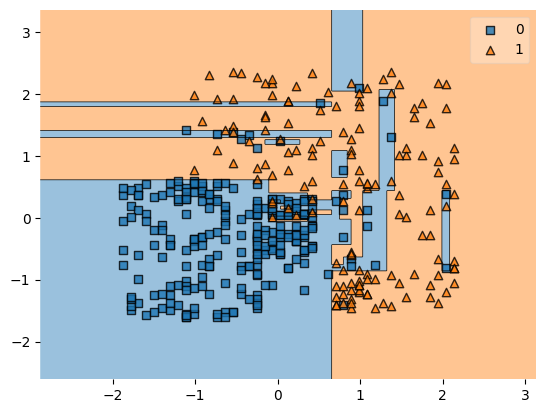

In [25]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)

In [15]:
dt.predict([[19,19000]])


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

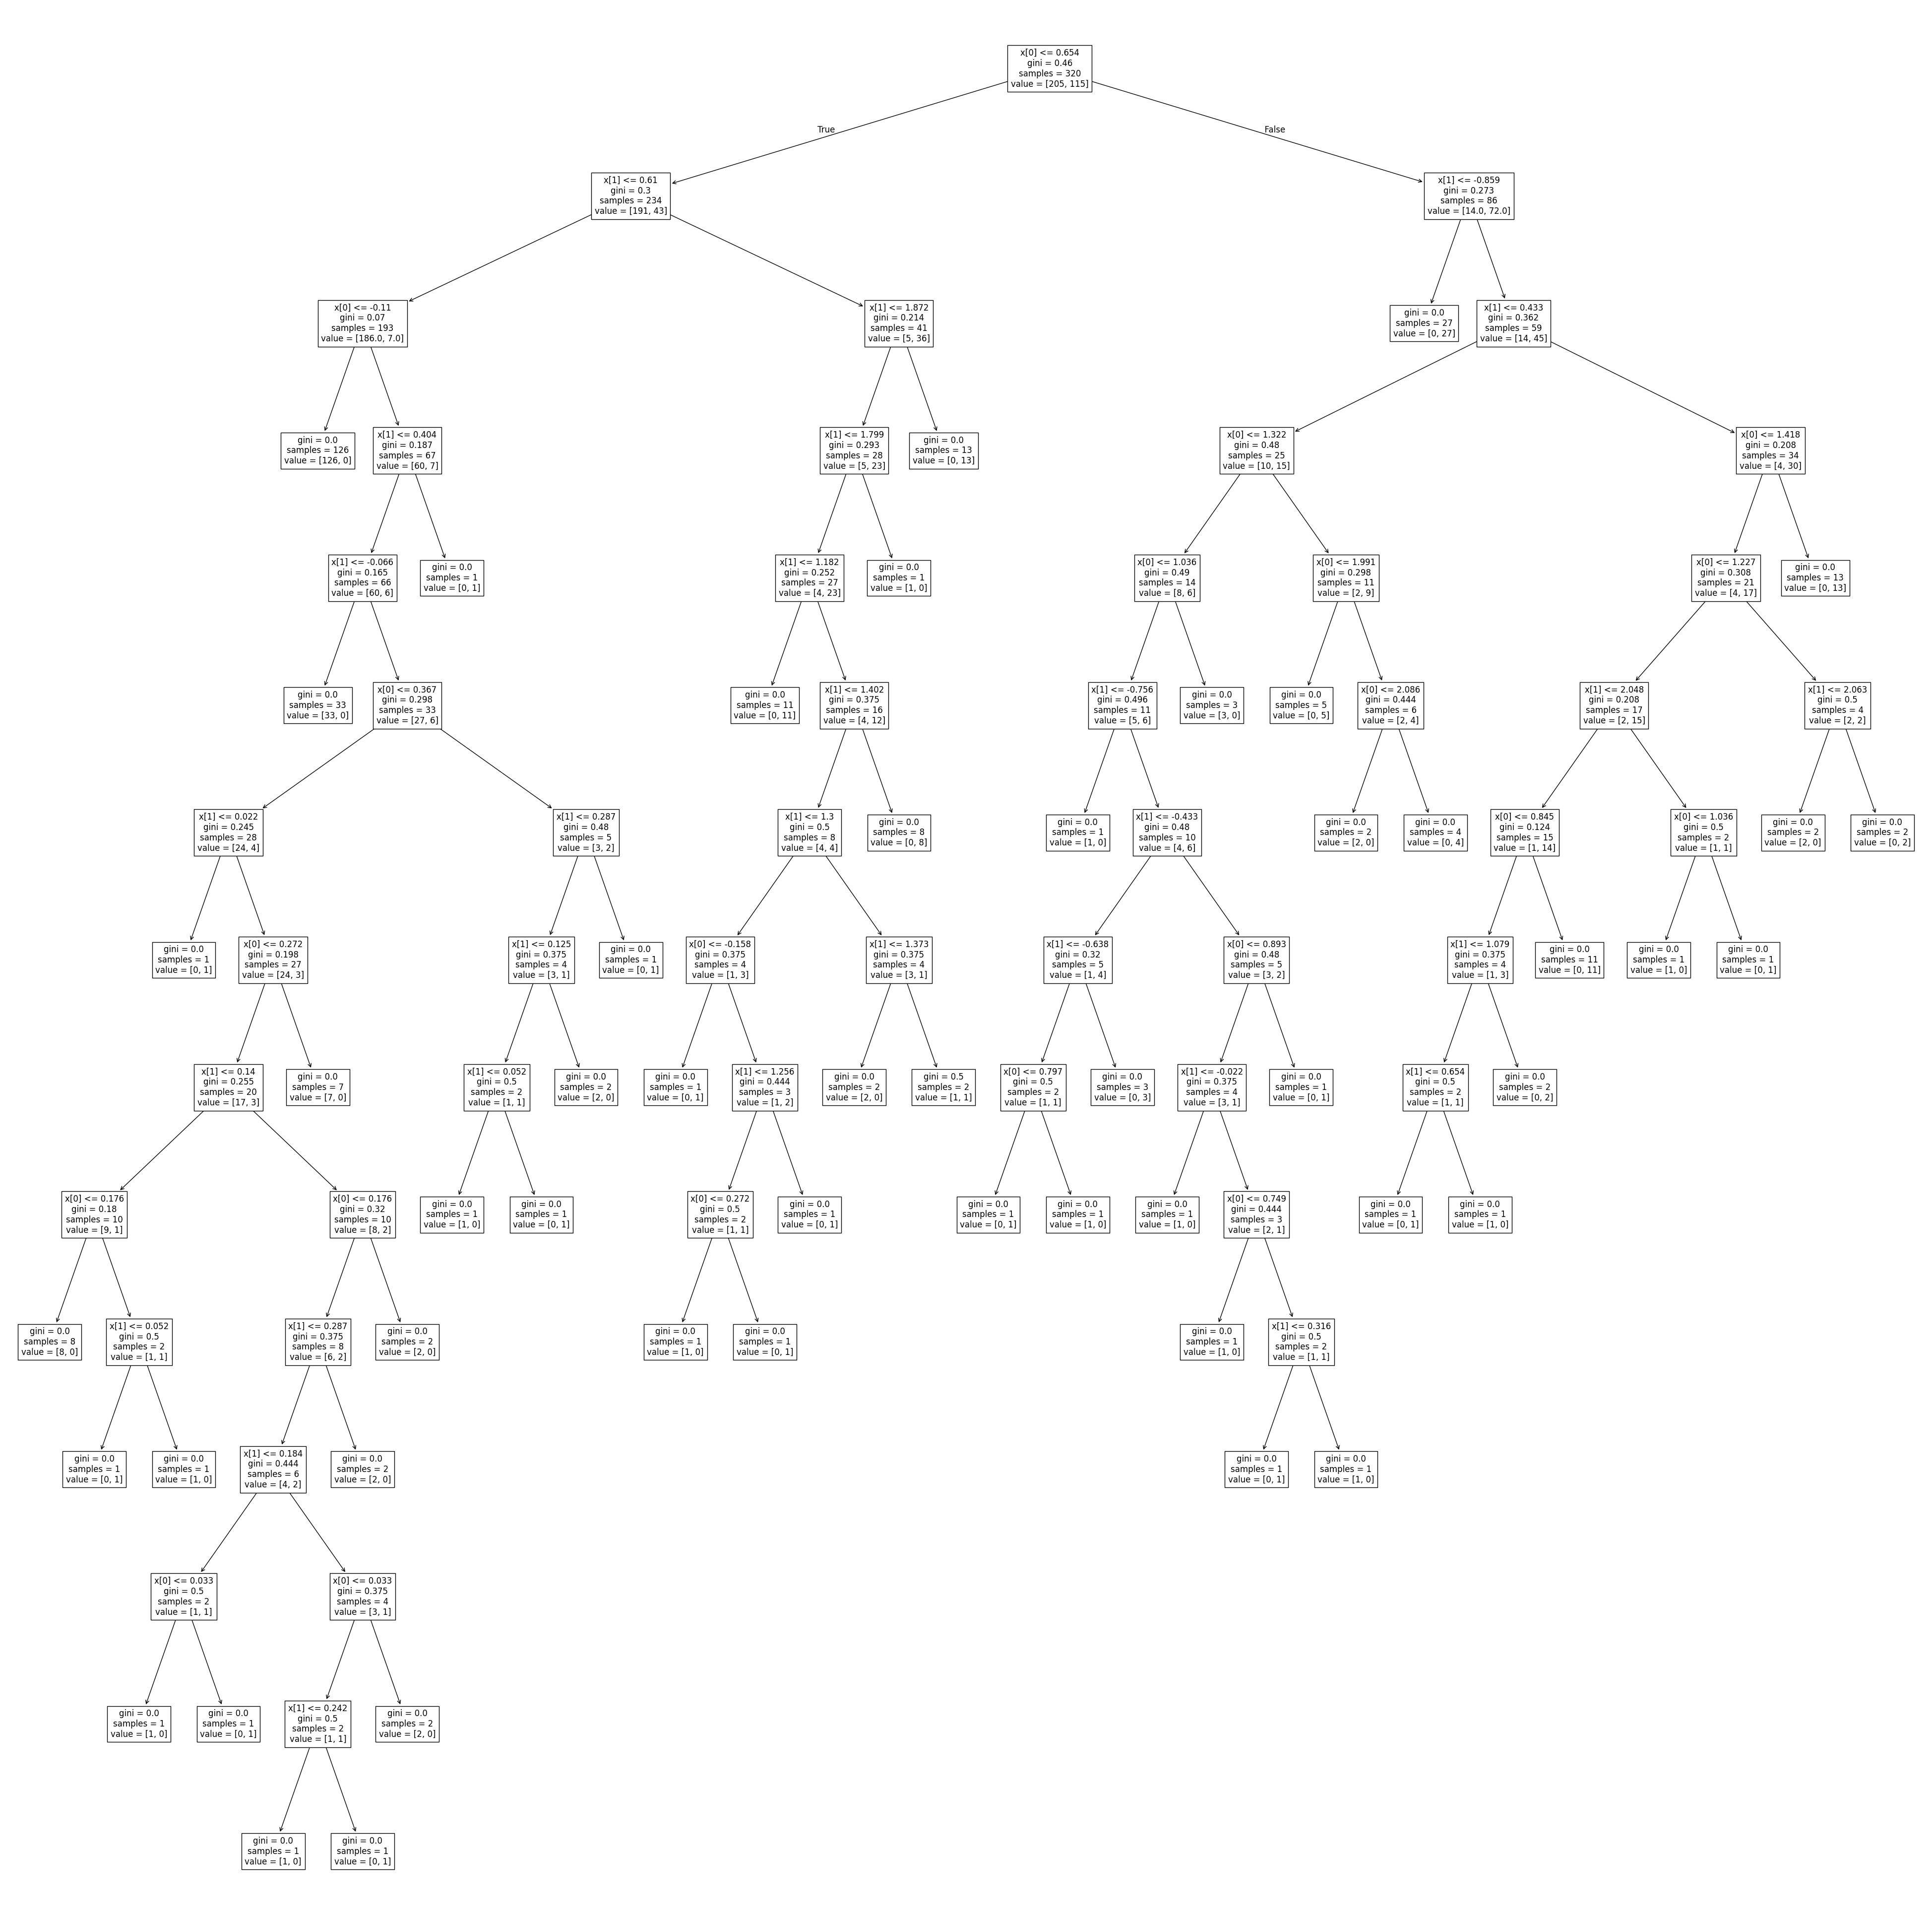

In [21]:
plt.figure(figsize=(50,50))
from sklearn.tree import plot_tree
plot_tree(dt)
plt.savefig("demo2.png")
plt.show()